# News Headlines Sentiment - Gregory Terrinoni

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 


In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from newsapi.newsapi_client import NewsApiClient
from datetime import date
analyzer = SentimentIntensityAnalyzer()


%matplotlib inline

In [3]:
# Reading api key environment variable
load_dotenv()

True

In [4]:
# Creating a newsapi client
newsapi = NewsApiClient(api_key=os.environ["NEWS_API_KEY"])

In [5]:
# Fetching the Bitcoin news articles
end = date.today().strftime("%Y-%m-%d")
start = (pd.to_datetime(end) - pd.DateOffset(days=29)).strftime("%Y-%m-%d")

btc_articles = newsapi.get_everything(
                q='bitcoin',
                from_param=start,
                to=end,
                language="en",
                sort_by="relevancy")

In [6]:
# Fetching the Ethereum news articles
eth_articles = newsapi.get_everything(
                q='ethereum',
                from_param=start,
                to=end,
                language="en",
                sort_by="relevancy")

In [7]:
# Creating the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        btc_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "text": text           
        })
        
    except AttributeError:
        pass
    
# Creating DataFrame
btc_sentiments = pd.DataFrame(btc_sentiments)

# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
btc_sentiments_df = btc_sentiments[cols]
btc_sentiments_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,..."


In [8]:
# Creating the ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        neg = sentiment["neg"]
        neu = sentiment["neu"]
        pos = sentiment["pos"]
        
        eth_sentiments.append({
           
            "Compound": compound,
            "Negative": neg,
            "Neutral": neu,
            "Positive": pos,
            "text": text           
        })
        
    except AttributeError:
        pass
    
# Creating DataFrame
eth_sentiments = pd.DataFrame(eth_sentiments)

# Reordering DataFrame columns
cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
eth_sentiments_df = eth_sentiments[cols]
eth_sentiments_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
1,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...
2,0.4215,0.000,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...
3,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...
4,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...


In [9]:
# Describing the Bitcoin Sentiment
btc_sentiments_df.describe()

,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.255311,0.017579,0.902526,0.079842
std,0.352664,0.035419,0.084095,0.075083
min,-0.585900,0.000000,0.773000,0.000000
25%,0.000000,0.000000,0.833500,0.000000
50%,0.202300,0.000000,0.897000,0.072000
75%,0.538650,0.000000,1.000000,0.150000
max,0.801600,0.103000,1.000000,0.209000


In [10]:
# Describing the Ethereum Sentiment
eth_sentiments_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.073320,0.014450,0.953800,0.031750
std,0.142820,0.035862,0.071019,0.043627
min,-0.128000,0.000000,0.753000,0.000000
25%,0.000000,0.000000,0.931500,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.110475,0.000000,1.000000,0.063000
max,0.421500,0.119000,1.000000,0.128000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [11]:
#Importing dependencies 
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lemmatizer = WordNetLemmatizer()

In [12]:
# Expanding the default stopwords list if necessary
sw = set(stopwords.words('english'))
sw_addon = {'file', 'photo', 'reuters','representation', 
            'illustration', 'motherboard', 'PC', 'picture',
            'reutersdado', 'ruvicillustrationlondon', 'char', 'visahas'}

In [13]:
# Defining the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [14]:
#Looping through the bitcoin text to create a list of tokens
btc_text = btc_sentiments_df['text'].tolist()
btc_tokens = []
for text in btc_text:
    tokens = tokenizer(text)
    btc_tokens.append(tokens)

# Adding that list of tokens to the sentiments dataframe
btc_sentiments_df['tokens'] = btc_tokens
btc_sentiments_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.6369,0.000,0.838,0.162,Visa has partnered with cryptocurrency startup...,"[partnered, cryptocurrency, startup, blockfi, ..."
1,0.6486,0.000,0.826,0.174,After reaching a previous all-time high on Nov...,"[reaching, previous, alltime, high, november, ..."
2,0.4019,0.000,0.928,0.072,Its been almost three years to the day since t...,"[almost, three, year, day, since, price, bitco..."
3,0.2732,0.083,0.781,0.136,Everything is dumb until it works.\r\nAs 2020 ...,"[everything, dumb, worksas, come, close, crypt..."
4,0.2023,0.000,0.950,0.050,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."


In [15]:
#Looping through the ethereum text to create a list of tokens
eth_text = eth_sentiments_df['text'].tolist()
eth_tokens = []
for text in eth_text:
    tokens = tokenizer(text)
    eth_tokens.append(tokens)
    
# Adding that list of tokens to the sentiments dataframe
eth_sentiments_df['tokens'] = eth_tokens
eth_sentiments_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[ethereum, virtual, currency, standing, pc, se..."
1,0.0000,0.000,1.000,0.000,FILE PHOTO: Representation of the Ethereum vir...,"[ethereum, virtual, currency, standing, pc, se..."
2,0.4215,0.000,0.912,0.088,LONDON (Reuters) - Digital currencies Ethereum...,"[london, digital, currency, ethereum, xrp, soa..."
3,0.0772,0.085,0.849,0.066,Bitcoin was once derided by serious investors ...,"[bitcoin, wa, derided, serious, investor, bubb..."
4,0.0000,0.000,1.000,0.000,FILE PHOTO: A representation of virtual curren...,"[virtual, currency, bitcoin, seen, front, stoc..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
#Importing dependencies 
from collections import Counter
from nltk import ngrams

In [17]:
# Joining the list of lists to a single list of words to feed into ngrams
btc_unpacked = [x for i in btc_tokens for x in i]

# Generating the Bitcoin N-grams where N=2
bigram_counts_btc = Counter(ngrams(btc_unpacked, n=2))
print(dict(bigram_counts_btc))

{('partnered', 'cryptocurrency'): 1, ('cryptocurrency', 'startup'): 1, ('startup', 'blockfi'): 1, ('blockfi', 'offer'): 1, ('offer', 'first'): 1, ('first', 'reward'): 1, ('reward', 'credit'): 1, ('credit', 'card'): 1, ('card', 'pay'): 1, ('pay', 'bitcoin'): 1, ('bitcoin', 'rather'): 1, ('rather', 'cash'): 1, ('cash', 'worth'): 1, ('worth', 'applying'): 1, ('applying', 'unless'): 1, ('unless', 'youre'): 1, ('youre', 'extremely'): 1, ('extremely', 'bullish'): 1, ('bullish', 'reaching'): 1, ('reaching', 'previous'): 1, ('previous', 'alltime'): 1, ('alltime', 'high'): 3, ('high', 'november'): 1, ('november', 'th'): 1, ('th', 'december'): 1, ('december', 'st'): 1, ('st', 'bitcoin'): 1, ('bitcoin', 'trading'): 1, ('trading', 'well'): 1, ('well', 'ha'): 1, ('ha', 'surpassed'): 1, ('surpassed', 'previous'): 1, ('previous', 'peak'): 1, ('peak', 'pricebitcoins'): 1, ('pricebitcoins', 'value'): 1, ('value', 'ha'): 1, ('ha', 'rapidly'): 1, ('rapidly', 'almost'): 1, ('almost', 'three'): 1, ('three'

In [18]:
# Joining the list of lists to a single list of words to feed into ngrams
eth_unpacked = [x for i in eth_tokens for x in i]

# Generating the Ethereum N-grams where N=2
bigram_counts_eth = Counter(ngrams(eth_unpacked, n=2))
print(dict(bigram_counts_eth))

{('ethereum', 'virtual'): 3, ('virtual', 'currency'): 12, ('currency', 'standing'): 2, ('standing', 'pc'): 2, ('pc', 'seen'): 2, ('seen', 'february'): 2, ('february', 'ethereum'): 1, ('february', 'london'): 1, ('london', 'digital'): 1, ('digital', 'currency'): 1, ('currency', 'ethereum'): 1, ('ethereum', 'xrp'): 1, ('xrp', 'soared'): 1, ('soared', 'monday'): 1, ('monday', 'gaining'): 1, ('gaining', 'momentum'): 1, ('momentum', 'bitcoin'): 1, ('bitcoin', 'powered'): 1, ('powered', 'towards'): 1, ('towards', 'alltime'): 1, ('alltime', 'highfile'): 1, ('highfile', 'ethereum'): 1, ('currency', 'bitcoin'): 10, ('bitcoin', 'wa'): 1, ('wa', 'derided'): 1, ('derided', 'serious'): 1, ('serious', 'investor'): 1, ('investor', 'bubble'): 1, ('bubble', 'ponzi'): 1, ('ponzi', 'scheme'): 1, ('scheme', 'year'): 1, ('year', 'ha'): 1, ('ha', 'become'): 1, ('become', 'irresistible'): 1, ('irresistible', 'investment'): 1, ('investment', 'many'): 1, ('many', 'themjust'): 1, ('themjust', 'wednesday'): 1, ('

In [19]:
# Defining token_count function
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Getting the top 10 words for Bitcoin
token_count(bigram_counts_btc)

[(('virtual', 'currency'), 4),
 (('alltime', 'high'), 3),
 (('new', 'alltime'), 2),
 (('seen', 'taken'), 2),
 (('stafffile', 'virtual'), 2),
 (('currency', 'bitcoin'), 2),
 (('bitcoin', 'seen'), 2),
 (('taken', 'november'), 2),
 (('partnered', 'cryptocurrency'), 1),
 (('cryptocurrency', 'startup'), 1)]

In [21]:
# Getting the top 10 words for Ethereum
token_count(bigram_counts_eth)

[(('virtual', 'currency'), 12),
 (('currency', 'bitcoin'), 10),
 (('bitcoin', 'seen'), 8),
 (('taken', 'november'), 6),
 (('seen', 'taken'), 5),
 (('ethereum', 'virtual'), 3),
 (('seen', 'front'), 3),
 (('front', 'stock'), 3),
 (('stock', 'graph'), 3),
 (('graph', 'taken'), 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
# Importing dependencies 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

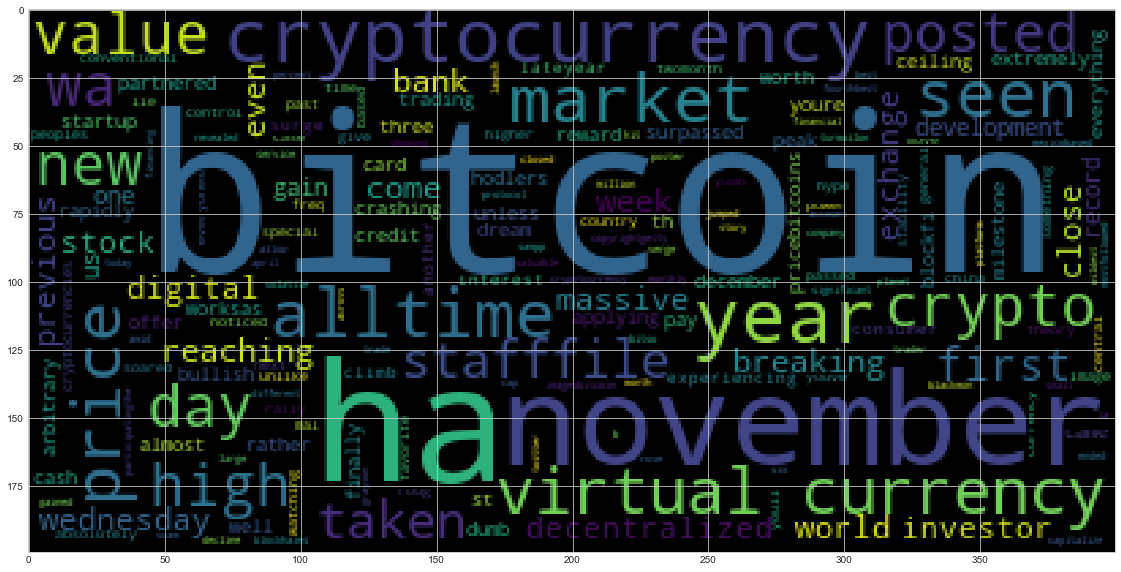

In [23]:
# Generating the Bitcoin word cloud
btc_joined = " ".join(btc_unpacked)
wc = WordCloud().generate(btc_joined)
plt.imshow(wc)

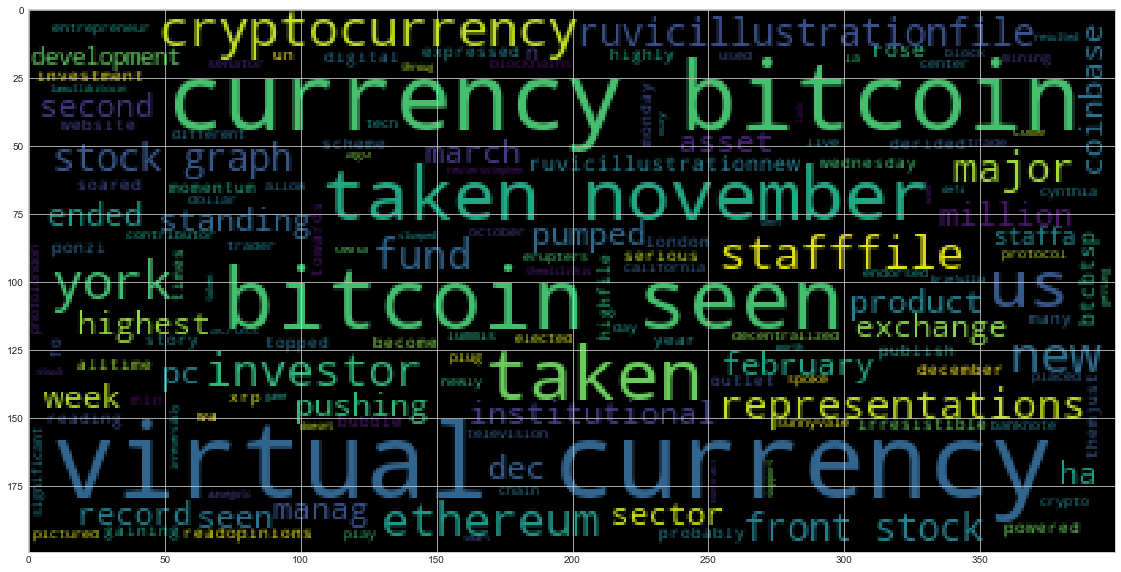

In [24]:
# Generating the Ethereum word cloud
eth_joined = " ".join(eth_unpacked)
wc = WordCloud().generate(eth_joined)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [25]:
# Importing dependencies
import spacy
from spacy import displacy

In [26]:
# Optional - download a language model for SpaCy
#!python -m spacy download en_core_web_sm

In [27]:
# Loading the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [28]:
# Concatenating all of the bitcoin text together
btc_text_unpacked = []
for x in btc_text:
    btc_text_unpacked.append(x)

btc_text_cleaned = " ".join(btc_text_unpacked)

In [29]:
# Running the NER processor on all of the text
btc_doc = nlp(btc_text_cleaned)

# Add a title to the document
# YOUR CODE HERE!

In [30]:
# Rendering the visualization
displacy.render(btc_doc, style='ent')

In [37]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

Visa ORG
first ORDINAL
Bitcoin GPE
November 30th, 2020 DATE
December 1st DATE
2020 DATE
bitcoin GPE
above $20,000 MONEY
almost three years DATE
the day DATE
Bitcoin GPE
20,000 MONEY
Wednesday DATE
2020 DATE
late-year DATE
Bitcoin GPE
over $23,000 MONEY
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Bitcoin GPE
20,000 MONEY
14,800 MONEY
more than 170% PERCENT
this year DATE
Six years DATE
Mexico GPE
$62 million MONEY
Decentralized GPE
4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Grayson Blackmon / PERSON
the year DATE
the day DATE
Twitter ORG
6 CARDINAL
6 CARDINAL
one CARDINAL
above $20,000 MONEY
Wednesday DATE
a year DATE
Reuters ORG
Bitcoin GPE
U.S. GPE
January 6, 2020 DATE
REUTERS/ ORG
Dado Ruvic/File Photo ORG
LONDON GPE
Reuters ORG
B

---

## Ethereum NER

In [32]:
# Concatenating all of the bitcoin text together
eth_text_unpacked = []
for x in eth_text:
    eth_text_unpacked.append(x)

eth_text_cleaned = " ".join(eth_text_unpacked)

In [33]:
# Running the NER processor on all of the text
eth_doc = nlp(eth_text_cleaned)

# Add a title to the document


In [34]:
# Rendering the visualization
displacy.render(eth_doc, style='ent')

In [36]:
# Listing all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
Bitcoin GPE
this year DATE
Wednesday DATE
bitcoin GPE
20,000 MONEY
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
Bitcoin GPE
March 13, 2020 DATE
REUTERS/ ORG
Reuters ORG
U.S. GPE
NEW YORK GPE
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
The New York Times ORG
Coinbase ORG
December DATE
15 DATE
2020 DATE
6 min QUANTITY
A few days ago DATE
US GPE
Cynthia Lummis PERSON
Bitcoin GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
